# Lab 2 Text Data

Cameron Matson

## Purpose

This dataset is a collection reviews from Pitchfork, a music review site.  It 18,393 reviews contains reviews from 1999 to the present day.  They look at a variety There is a lot of research being done related to the way that people interact with music, specifically how they describe it in words.  What I'd like to get out of this data is if there is any relation between way the music is described in the reviews and the music itself.

The data was acquired at https://www.kaggle.com/nolanbconaway/pitchfork-data

## Data
### Aggregation and Cleaning

The data was stored in a database in several tables, so first we need to restructure it.

In [489]:
import pandas as pd
import numpy as np

reviews = pd.read_csv('../data/reviews.csv')
print('number of reviews:',len(reviews))
reviews.head()

number of reviews: 18393


,reviewid,content
0,22703,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,"Eight years, five albums, and two EPs in, the ..."
2,22659,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,Kleenex began with a crash. It transpired one ...
4,22725,It is impossible to consider a given release b...


In [490]:
meta = pd.read_csv('../data/meta.csv')
meta.info()
meta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 13 columns):
reviewid          18393 non-null int64
title             18391 non-null object
artist            18391 non-null object
url               18393 non-null object
score             18393 non-null float64
best_new_music    18393 non-null int64
author            18393 non-null object
author_type       14487 non-null object
pub_date          18393 non-null object
pub_weekday       18393 non-null int64
pub_day           18393 non-null int64
pub_month         18393 non-null int64
pub_year          18393 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 1.8+ MB


,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


All we want from the meta data is the score and best_new_music feature, because we want to see if we can label the reviewers feelings about the album from the text itself.

In [491]:
meta.drop(['title','artist', 'url', 'author', 'author_type', 'best_new_music', 'pub_date', 'pub_weekday', 'pub_day', 'pub_month', 'pub_year'], axis=1, inplace=True)
meta.info()
meta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 2 columns):
reviewid    18393 non-null int64
score       18393 non-null float64
dtypes: float64(1), int64(1)
memory usage: 287.5 KB


,reviewid,score
0,22703,9.3
1,22721,7.9
2,22659,7.3
3,22661,9.0
4,22725,8.1


Finally we want the genre to see if we can infer that from the review

In [492]:
genres = pd.read_csv('../data/genres.csv')

# some have multiple genres, for now lets just choose the first one
genres.drop_duplicates(subset=['reviewid'],inplace=True)

genres.info()
genres.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 22679
Data columns (total 2 columns):
reviewid    18389 non-null int64
genre       16024 non-null object
dtypes: int64(1), object(1)
memory usage: 431.0+ KB


,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic


It appears that some of the reviews didn't have genres listed.  We'll drop these.

In [493]:
genres.dropna(inplace=True)
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16024 entries, 0 to 22676
Data columns (total 2 columns):
reviewid    16024 non-null int64
genre       16024 non-null object
dtypes: int64(1), object(1)
memory usage: 375.6+ KB


In [494]:
df = pd.merge(genres, reviews, on='reviewid')
df = pd.merge(df, meta, on='reviewid')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16030 entries, 0 to 16029
Data columns (total 4 columns):
reviewid    16030 non-null int64
genre       16030 non-null object
content     16021 non-null object
score       16030 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 626.2+ KB


,reviewid,genre,content,score
0,22703,electronic,"“Trip-hop” eventually became a ’90s punchline,...",9.3
1,22721,metal,"Eight years, five albums, and two EPs in, the ...",7.9
2,22659,rock,Minneapolis’ Uranium Club seem to revel in bei...,7.3
3,22661,rock,Kleenex began with a crash. It transpired one ...,9.0
4,22725,electronic,It is impossible to consider a given release b...,8.1


Looks like there were still a few reviews that didn't match up in all three tables, or that there were some null values in which if fine, we'll just drop to the lowest common denominator

In [495]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16021 entries, 0 to 16029
Data columns (total 4 columns):
reviewid    16021 non-null int64
genre       16021 non-null object
content     16021 non-null object
score       16021 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 625.8+ KB


That's a lot of reviews, for efficiency's sake lets just take a sample

In [496]:
df_sample = df.sample(n=1000).dropna()
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 316 to 9523
Data columns (total 4 columns):
reviewid    1000 non-null int64
genre       1000 non-null object
content     1000 non-null object
score       1000 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.1+ KB



## Feature Representation
### Bag of Words


In [497]:
from sklearn.feature_extraction.text import CountVectorizer

# make a CountVectorizer object
counter = CountVectorizer(stop_words='english')

# list where each element is an entire review
all_text = df_sample.content.tolist()

# use counter object to transorm the text in to BOW
bag_words = counter.fit_transform(all_text)
print(bag_words.shape)

(1000, 36467)


In [498]:
# I'm not even going to run this cell, because it takes too long
# print(counter.vocabulary_)

That's a lot of words.  How might we be able to reduce it?  The problem is that the most common way that people talk about music is through metaphor, so it makes it difficult to choose a narrow vocabulary in general.  However, for this analysis, we are primarilly concerned with how the reviewer *described* the album, therefore we might limit our vocabulary to words that describe things i.e. adjectives and adverbs.

To do this we'll use a Parts of Speech Tagger from the Natrual Language Toolkit.  We will be using a unigram tagger, which assigns the most common tag to a word, based on a corpus.  We do this because our bag of words model has already stripped the potential part of speech context provided by the sentence.

In [499]:
def make_descriptor_vocab(old_vocab):
    '''Returns a list of adjectives and adverbs found in (list) old_vocab'''
    vocab = []

    # Unigram Tagger is an object that is trained on an already tagged dataset, in this case the Brown Corpus.
    # https://en.wikipedia.org/wiki/Brown_Corpus
    unigram_tagger = UnigramTagger(brown.tagged_sents())


    for tok, tag in unigram_tagger.tag(old_vocab):
        # words unknown to the tagger are taged None, JJ and RB corespond to adj. and adv. respectively
        if tag is not None and (tag[0:2] == 'JJ' or tag[0:2] == 'RB'):
            vocab.append(tok)

    return vocab


In [500]:
from nltk.tag import UnigramTagger
from nltk.corpus import brown

In [501]:
%%time

vocab = make_descriptor_vocab([w for w in counter.vocabulary_.keys()]) # pass in the list of words in the old vocab

CPU times: user 13 s, sys: 353 ms, total: 13.3 s
Wall time: 14 s


In [502]:
print(len(vocab))

3735


Hey! That seems managable!

In [503]:
# and now I can run this!
print(counter.vocabulary_)

{'shape': 28630, 'shift': 28735, 'according': 529, 'singer': 29153, 'guitarist': 14216, 'laura': 18230, 'jane': 17058, 'grace': 13845, 'album': 1081, 'relationships': 26348, 'trans': 33129, 'perspective': 23551, 'people': 23411, 'able': 401, 'fall': 11596, 'love': 19016, 'sing': 29147, 'songs': 29890, 'just': 17457, 'valid': 34537, 'said': 27677, 'recent': 25954, 'interview': 16726, 'ew': 11125, 'ways': 35356, 'precisely': 24537, 'breakup': 4082, 'record': 26039, 'described': 8550, 'radiate': 25543, 'locus': 18839, 'rupture': 27552, 'space': 30031, 'missing': 20571, 'sings': 29163, 'haunting': 14668, 'haunted': 14667, 'haunts': 14670, 'song': 29882, 'casual': 5046, 'sex': 28536, 'rebecca': 25912, 'sits': 29213, 'trembling': 33282, 'fermata': 11883, 'new': 21616, 'previous': 24722, 'transgender': 33155, 'dysphoria': 10007, 'blues': 3603, 'depicted': 8475, 'total': 32979, 'shattering': 28667, 'rebuilding': 25929, 'sense': 28407, 'self': 28372, 'occurs': 22136, 'externally': 11426, 'focus

In [504]:
counter = CountVectorizer(stop_words='english', vocabulary=vocab)

bag_words = counter.fit_transform(all_text)

df_bow = pd.DataFrame(data=bag_words.toarray(), columns=counter.get_feature_names())

print(df_bow.shape)
df_bow.head()

(1000, 3735)


,able,just,valid,recent,precisely,haunting,casual,new,previous,externally,...,narrower,drier,theological,hatted,afoot,indirect,overconfident,familiarly,lunar,archeological
0,1,1,1,1,1,1,1,3,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The words that have the highest frequency in the corpus are:

In [505]:
df_bow.max().sort_values()[-10:]

bad        12
free       12
meek       13
low        14
young      16
haggard    16
white      16
swift      18
vile       19
black      22
dtype: int64

Those really don't seem too descriptive, or rather descriptive in the sense of conveying information about the genre, or the valence of the reviewers emotion.

### TF-IDF
A more compmlex representation of the dataset would be term frequency, inverse document frequency or TFIDF which takes into consideration not only how frequently a word appears in each document (tf), but also how frequently it appears in the corpus as a whole (idf).  Again we'll limit the model to descriptors (adj. and adv.)

In [506]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TFIDF object
tfidfer = TfidfVectorizer(stop_words='english', vocabulary=vocab)


tfidf = tfidfer.fit_transform(all_text)
print(tfidf.shape)

df_tfidf = pd.DataFrame(data=tfidf.toarray(),columns=tfidfer.get_feature_names())
df_tfidf.head()


(1000, 3735)


,able,just,valid,recent,precisely,haunting,casual,new,previous,externally,...,narrower,drier,theological,hatted,afoot,indirect,overconfident,familiarly,lunar,archeological
0,0.106994,0.040942,0.167642,0.084547,0.142735,0.126944,0.125449,0.137743,0.092841,0.215769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.101219,0.000000,0.104509,0.000000,0.000000,0.000000,0.056755,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.044932,0.000000,0.000000,0.000000,0.069657,0.000000,0.050388,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.051514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [507]:
# 10 highest tfidf terms
df_tfidf.max().sort_values()[-10:]

white       0.835987
stern       0.841603
sole        0.848723
happy       0.849426
pink        0.865860
meek        0.911124
imperial    0.911213
swift       0.916902
haggard     0.928011
vile        0.946348
dtype: float64

These words definitely have stronger (for the most part negative) connotations than the top words by frequency.  This might be a better model for classifying.

## Summary Statistics

In [508]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Word Frequencies

**insert viz code here**

### Document Length
First we need to add a feature corresponding to the length of the review

In [509]:
df_sample['length'] = df.content.str.len()
df_sample.head()

,reviewid,genre,content,score,length
316,22419,rock,"Shape Shift With Me is, according to Against M...",7.4,4544
11841,2979,rock,How I Learned To Stop Worrying And Love The Fa...,9.6,3894
1438,21066,rock,"""Not only is this the last show of the tour"", ...",8.2,9612
9043,11208,rock,\r\n Baltimore is as musically diverse as a...,8.5,3465
13695,1712,rock,Two of the first three songs in this mess are ...,7.2,2176


Let's look at the distribution of review lengths.

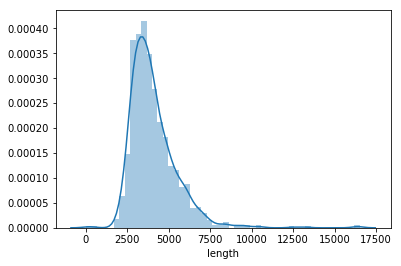

In [510]:
sns.distplot(df_sample.length)

Looks like a nice normal distribution with a long left tail, which make sense.  They probably have at pitchfork a standard min and max length for reviews, with the occasional long winded write-up thrown in.

### most relevant words

**insert viz code here**

### vocabulary size

**insert viz code here**

## Relation to Target Class

What we want to do is look at how the text relates to the following labels:
   - genre
   - reviewer emotion (score/best_new_music)

### Genre

We'd like to see if we could classify the genre of an album from the way that it was reviewed.  Pitchfork categorizes albums from the following categories.

In [511]:
set(df.genre)

{'electronic',
 'experimental',
 'folk/country',
 'global',
 'jazz',
 'metal',
 'pop/r&b',
 'rap',
 'rock'}

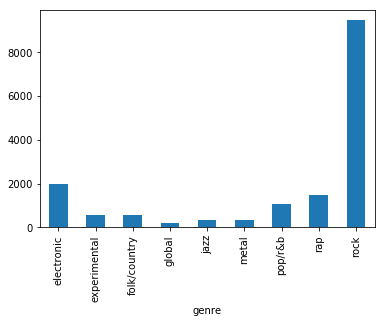

In [512]:
df.groupby(by='genre').size().plot(kind='bar') # note that this not the sampled DataFrame from above
plt.show()

Clearly rock is the most reviewed genre.  This makes sense as Pitchfork started out as a site for exclusively for Indie music reviews, and I wouldn't be suprised to see if most of those reviews were labeled 'rock'.  Let's look at 4 differnet genres and resample the corpus so that they have the same number of reviews.



In [513]:
from time import time

rock = df[df.genre == 'rock'].sample(n=500, random_state=int(time()))
rap = df[df.genre=='rap'].sample(n=500, random_state=int(time()))


#### Word Frequency

Let's make a bag of words model for each of genres to see if there are any noticeable differences between them.

In [564]:
def make_bow(data, descriptor_only=False):
    '''Creates a Bag of Words Dataframe from the list <data>.  If <descriptor_only> is true \
it will remove all words that aren't adjectives adverbs'''
    counter = CountVectorizer(stop_words='english')
    
    words = counter.fit_transform(data)
    
    if descriptor_only:
        vocab = make_descriptor_vocab([w for w in counter.vocabulary_.keys()])
        
        counter = CountVectorizer(stop_words='english', vocabulary=vocab)

        words = counter.fit_transform(data)

    df_bow = pd.DataFrame(data=words.toarray(), columns=counter.get_feature_names())
    return df_bow        

In [515]:
%%time
rock_bow = make_bow(rock.content.tolist(), True)
rap_bow = make_bow(rap.content.tolist(), True)


CPU times: user 27.9 s, sys: 633 ms, total: 28.5 s
Wall time: 29.2 s


In [516]:
print('Rock reviews had a vocabulary of {} words'.format(rock_bow.shape[1]))
print('Rap reviews had a vocabulary of {} words'.format(rap_bow.shape[1]))


Rock reviews had a vocabulary of 3114 words
Rap reviews had a vocabulary of 3151 words


Lets look at the overlap and difference

In [517]:
# words and their freq for genre as a whole
rock_vocab = rock_bow.agg('sum', axis=0)
rap_vocab = rap_bow.agg('sum', axis=0)

# words that appear in both genres
intersection = set.intersection(set(rock_vocab.keys()), set(rap_vocab.keys()))

# words that only appear in each genre
rock_only = set(rock_vocab.keys()) - intersection
rap_only = set(rap_vocab.keys()) - intersection

pd.DataFrame([len(rock_only), len(rap_only), len(intersection)], index=['rock', 'rap', 'both'], columns=['vocab size'])


,vocab size
rock,583
rap,620
both,2531


This result implies that the way people the reviewers describe each of these genres is similar.  There are over 4x more words used to describe both genres, than words which are only used to describe one or the other.  What's interesting is that the genre specific vocabularies are roughly equal in size.

In [518]:
# top ten of each category
rock_top = rock_vocab[rock_only].sort_values(ascending=False)[:10]
rap_top = rap_vocab[rap_only].sort_values(ascending=False)[:10]
general_top = rock_vocab[intersection].sort_values(ascending=False)[:10] # since the intersection is 
                                                                            # both we just pull from one series


In [574]:
import plotly as py
import plotly.graph_objs as go

rock_trace = go.Bar(
    x=list(range(1,len(rock_top)+1)),
    y=rock_top.values,
    text=rock_top.keys(),
    name='rock'
    
)

rap_trace = go.Bar(
    x=list(range(1,len(rap_top)+1)),
    y=rap_top.values,
    text=rock_top.keys(),
    name='rap'   
)

both_trace = go.Bar(
    x=list(range(1,len(general_top)+1)),
    y=general_top.values,
    text=general_top.keys(),
    name='both'   
)

data = [rock_trace, rap_trace, both_trace]
layout = go.Layout(
    barmode='group',
    title='Most Frequent Words',
    xaxis={'title':'word rank'},
    yaxis={'title':'Frequency', 'type':'log'}
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='most_frequent')

We can interpret two things from the above chart:
1. The most common words used in both genres appear *way* more often than words used specifically in one genre
2. The words specific to one genre are more descriptive, and have stronger connotations.  For example, (in one running of the notebook*) look at the third most frequent word in each of the groups
    - both: best
    - rock: fluffy
    - rap: **murderous**
    
Both of these points make sense, as words that are less descriptive and more general can be used to describe, in general, more things.  However, its hard to say whether the words that only appear in rock reviews are inheirently more *rock* than the words that appear only in rap reviews, or vice versa.



*since reviews are randomly sampled each time this will change from run to run, but its included because it illustrates the point well.

#### "Relevant" Words

Let's look at which words are "relevant" to each category according to they're TFIDF rank.  We'll be performing the same analysis as before, but grouped by genre.

In [521]:
%%time

rock_tfidfer = TfidfVectorizer(stop_words='english', vocabulary=rock_vocab.keys())

tfidf = tfidfer.fit_transform(rock.content.tolist())

rock_tfidf = pd.DataFrame(data=tfidf.toarray(),columns=tfidfer.get_feature_names())

####

rap_tfidfer = TfidfVectorizer(stop_words='english', vocabulary=rap_vocab.keys())

tfidf = tfidfer.fit_transform(rap.content.tolist())

rap_tfidf = pd.DataFrame(data=tfidf.toarray(),columns=tfidfer.get_feature_names())

CPU times: user 583 ms, sys: 18.1 ms, total: 601 ms
Wall time: 631 ms


In [522]:
rock_tfidf_top = rock_tfidf.max().sort_values(ascending=False)[:10]
rap_tfidf_top = rap_tfidf.max().sort_values(ascending=False)[:10]

In [523]:
rock_trace = go.Bar(
    x=list(range(1,len(w)+1)),
    y=rock_tfidf_top.values,
    text=rock_tfidf_top.keys(),
    name='rock'
    
)
rap_trace = go.Bar(
    x=list(range(1,len(w)+1)),
    y=rap_tfidf_top.values,
    text=rap_tfidf_top.keys(),
    name='rap'
    
)

data = [rock_trace, rap_trace]
layout = go.Layout(
    barmode='group',
    title='Most Relevant Words',
    xaxis={'title':'word rank'},
    yaxis={'title':'TFIDF',}
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='most_frequent')

That doesn't really seem very effective either.  Again there's no clear distinction between rock words and rap words.  I think this boils down the difficulty of talking about music, and shows how flexible people can be when doing so.  Pretty much any word is up for grabs it seems.

### Rating

Perhaps if we group by a different a label, namely the score that the review recieved.  In theory this should be a more defining feature, as english has a well defined set of words with positive and negative connotations.

First let's take a look at the score distributions.

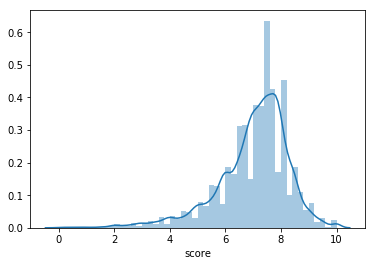

In [524]:
sns.distplot(df.score)
plt.show()

Looks pretty top heavy with a relatively wide peak, which is expected--no one wants to read a site that just says every album is bad, but they also want a little variety.

Let's just see how it breaks down by genre.

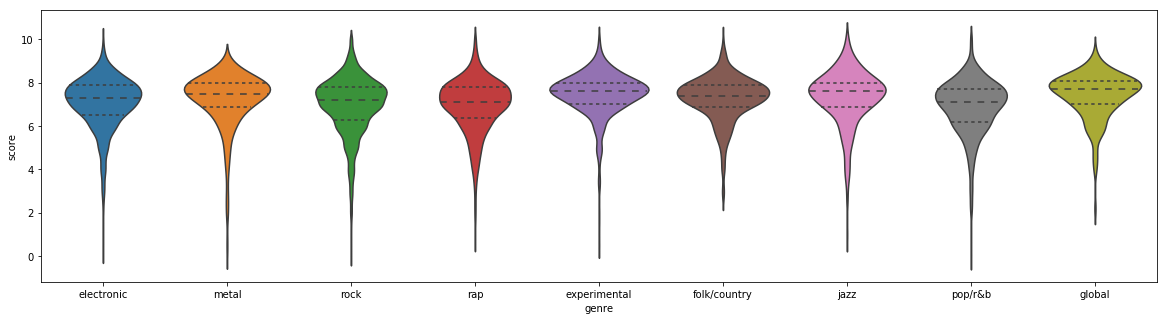

In [535]:
plt.figure(figsize=(20,5))
sns.violinplot(x='genre', y='score', data=df, inner='quartile')
plt.show()


They appear to all have relatively the same distribution, with a median score around 7.  This means that we shouldn't have to worry about the genre biasing the score.

Lets discretize the score column into three bins: bad, neutral, and good.

In [591]:
df['feeling'] = pd.cut(df.score, 3, labels=['bad', 'neutral', 'good'])
df.head()

,reviewid,genre,content,score,feeling
0,22703,electronic,"“Trip-hop” eventually became a ’90s punchline,...",9.3,good
1,22721,metal,"Eight years, five albums, and two EPs in, the ...",7.9,good
2,22659,rock,Minneapolis’ Uranium Club seem to revel in bei...,7.3,good
3,22661,rock,Kleenex began with a crash. It transpired one ...,9.0,good
4,22725,electronic,It is impossible to consider a given release b...,8.1,good


Now we'll go throught the same Bag-of-Words and TFIDF modeling as before.

In [561]:
%%time
bad_bow = make_bow(df[df.feeling=='bad'].content, True)
eh_bow = make_bow(df[df.feeling=='neutral'].content, True)
good_bow = make_bow(df[df.feeling=='good'].content, True)

In [592]:
# words and their freq for each category
bad_vocab = bad_bow.agg('sum', axis=0)
eh_vocab = eh_bow.agg('sum', axis=0)
good_vocab = good_bow.agg('sum', axis=0)

# words that appear in all categories
intersection = set.intersection(set(bad_vocab.keys()), set(eh_vocab.keys()), set(good_vocab.keys()))

# words that only appear in each category
bad_only = set(bad_vocab.keys()) - intersection
eh_only = set(eh_vocab.keys()) - intersection
good_only = set(good_vocab.keys()) - intersection


In [593]:
# grab top ten words in each category
bad_top = bad_vocab[rock_only].sort_values(ascending=False)[:10]
eh_top = eh_vocab[rap_only].sort_values(ascending=False)[:10]
good_top = good_vocab[rap_only].sort_values(ascending=False)[:10]

In [594]:
bad_trace = go.Bar(
    x=list(range(1,len(bad_top)+1)),
    y=bad_top.values,
    text=bad_top.keys(),
    name='bad',
    marker={'color':'rgb(168, 21, 21)'}
    
)

eh_trace = go.Bar(
    x=list(range(1,len(eh_top)+1)),
    y=eh_top.values,
    text=eh_top.keys(),
    name='eh',
    marker={'color':'rgb(224, 226, 206)'}  
)

good_trace = go.Bar(
    x=list(range(1,len(good_top)+1)),
    y=good_top.values,
    text=good_top.keys(),
    name='good',
    marker={'color':'rgb(14, 122, 34)'}
)

data = [bad_trace, eh_trace, good_trace]
layout = go.Layout(
    barmode='group',
    title='Most Frequent Words',
    xaxis={'title':'word rank'},
    yaxis={'title':'Frequency', 'type':'log'}
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='most_frequent')

This is promising!  For the most part, the words that only appear in bad reviews, are words that have negative connotations; words that only appear in good reviews are words that have positive connotations; and the words that appear in reviews that got middle level scores are a mix of both.

In [601]:
%%time

bad_tfidfer = TfidfVectorizer(stop_words='english', vocabulary=bad_vocab.keys())

tfidf = tfidfer.fit_transform(df[df.feeling=='bad'].content.tolist())

bad_tfidf = pd.DataFrame(data=tfidf.toarray(),columns=tfidfer.get_feature_names())

####

eh_tfidfer = TfidfVectorizer(stop_words='english', vocabulary=eh_vocab.keys())

tfidf = tfidfer.fit_transform(df[df.feeling=='neutral'].content.tolist())

eh_tfidf = pd.DataFrame(data=tfidf.toarray(),columns=tfidfer.get_feature_names())

####

good_tfidfer = TfidfVectorizer(stop_words='english', vocabulary=good_vocab.keys())

tfidf = tfidfer.fit_transform(df[df.feeling=='good'].content.tolist())

good_tfidf = pd.DataFrame(data=tfidf.toarray(),columns=tfidfer.get_feature_names())



CPU times: user 8.74 s, sys: 322 ms, total: 9.07 s
Wall time: 9.36 s


In [603]:
bad_tfidf_top = bad_tfidf.max().sort_values(ascending=False)[:10]
eh_tfidf_top = eh_tfidf.max().sort_values(ascending=False)[:10]
good_tfidf_top = good_tfidf.max().sort_values(ascending=False)[:10]

In [604]:
bad_trace = go.Bar(
    x=list(range(1,len(bad_tfidf_top)+1)),
    y=bad_tfidf_top.values,
    text=bad_tfidf_top.keys(),
    name='bad',
    marker={'color':'rgb(168, 21, 21)'}    
)

eh_trace = go.Bar(
    x=list(range(1,len(eh_tfidf_top)+1)),
    y=eh_tfidf_top.values,
    text=eh_tfidf_top.keys(),
    name='eh'
    
)

good_trace = go.Bar(
    x=list(range(1,len(good_tfidf_top)+1)),
    y=good_tfidf_top.values,
    text=good_tfidf_top.keys(),
    name='good'
    
)

data = [bad_trace, eh_trace, good_trace]
layout = go.Layout(
    barmode='group',
    title='Most Relevant Words',
    xaxis={'title':'word rank'},
    yaxis={'title':'TFIDF',}
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='most_frequent')